# Lista de exercícios cálculo numérico

## Bibliotecas:

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import plot
import math
import jacobi, gauss_seidel, linsys

## EXERCÍCIOS SOBRE SISTEMAS LINEARES

### 1. Determine os coeficientes a e b da reta que passa pelos pontos $P_1=(1,2)$ e $P_2=(3,5)$
Sugestão: substitua as coordenadas dos pontos $P_1$ e $P_2$ na equação $y = ax +b$ e
construa um sistema linear onde as incógnitas são $a$ e $b$ . Resolva o sistema
usando o Método de Gauss-Seidel. Use $\epsilon = 10^{-2}$.

In [2]:
A = np.array([[3,1],
              [1,1]])
b = np.array([[5],
              [2]])

res = gauss_seidel.solve(A,b,1e-2,100)
print("Resultado exato:", linsys.invMatSolve(A,b), sep='\n')
print(f"Resultado estimado ({res[1]} iterações):", res[0],sep='\n')

Resultado exato:
[[1.5]
 [0.5]]
Resultado estimado (5 iterações):
[[1.50205761]
 [0.49794239]]


### 2. Os ensaios de tração realizados em uma barra de aço apresentaram os seguintes resultados:

| $i$ | $$\epsilon (m)$$ | $$\sigma (kPa)$$ |
|:---:|:----------------:|:----------------:|
|  1  |       0.012      |        20        |
|  2  |        0.02      |        40        |

Onde i é o número da medida ($i=1,2,...$), $\sigma$ é a Tensão (eixo vertical) e $\epsilon$ é a Deformação (eixo horizontal).

* a) Faça um gráfico de Tensão pela Deformação.
* b) Supondo que a deformação no intervalo é elástica, utilize o conhecimento do Ex.1 para determinar a e b da equação de Tensão-Deformação.

$$\sigma (\epsilon) = a \epsilon + b$$

Resultado exato:
[[2500.]
 [ -10.]]
Resultado estimado (45 iterações):
[[2499.99999991]
 [ -10.        ]]


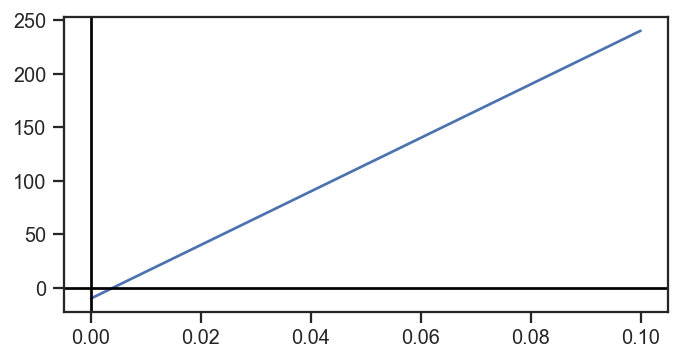

In [3]:
A = np.array([[0.02,1],
              [0.012,1]])
b = np.array([[40],
              [20]])

res = gauss_seidel.solve(A,b,1e-9,100)
print("Resultado exato:", linsys.invMatSolve(A,b), sep='\n')
print(f"Resultado estimado ({res[1]} iterações):", res[0],sep='\n')

func = lambda e : res[0][0]*e + res[0][1]
xarr = np.linspace(0,0.1,100)
plot.plot(xarr,func(xarr))

### 3) Determine os coeficientes A, B e C da parábola que passa pelos pontos $P_1=(0,1)$, $P_2=(0.5,1.5)$ e $P_3=(1.2,2)$.

Sugestão: substitua as coordenadas dos pontos $P_1$, $P_2$ e $P_3$ na equação y = $Ax^2 +Bx+C$ e construa um sistema linear onde as incógnitas são $A$, $B$ e $C$.

Resolva o sistema usando o Método de Gauss-Seidel. Use $\epsilon = 10^{-2}$.

In [4]:
A = np.array([[1.44,1.2,1],
              [0.25,0.5,1],
              [   0,  0,1]])
b = np.array([[  2],
              [1.5],
              [  1]])

res = gauss_seidel.solve(A,b,1e-2,100)
print("Resultado exato:", linsys.invMatSolve(A,b), sep='\n')
print(f"Resultado estimado ({res[1]} iterações):", res[0],sep='\n')

Resultado exato:
[[-0.23809524]
 [ 1.11904762]
 [ 1.        ]]
Resultado estimado (8 iterações):
[[-0.24326918]
 [ 1.12163459]
 [ 1.        ]]


### 4) Um objeto desloca-se em queda-livre. Determine a posição inicial ($y_o$), a velocidade inicial ($v_o$) e a gravidade ($g$), sabendo os valores da posição $y$ e do tempo $t$ em três instantes, dados pela tabela.

Utilize a equação $y(t) = y_o + v_o t – At^2$, onde $A=\frac{g}{2}$.

| i |  $$t(s)$$ | $$y(m)$$ |
|:-:|:---------:|:--------:|
| 1 |    0,0    |     4    |
| 2 |    0,6    |   2,23   |
| 3 |    1,0    |  -0,91   |

In [5]:
A = np.array([[1,  0,    0],
              [1,0.6,-0.36],
              [1,  1,   -1]])
b = np.array([[    4],
              [ 2.23],
              [-0.91]])

res = gauss_seidel.solve(A,b,1e-9,100)
print("Resultado exato:", linsys.invMatSolve(A,b), sep='\n')
print(f"Resultado estimado ({res[1]} iterações):", res[0],sep='\n')

y0 = res[0][0]
v0 = res[0][1]
g = res[0][2]*2

display(Markdown(f"$y_0 = {y0}$\n\n$v_0 = {v0}$\n\n$g = {g}$"))

Resultado exato:
[[ 4.  ]
 [-0.01]
 [ 4.9 ]]
Resultado estimado (41 iterações):
[[ 4.  ]
 [-0.01]
 [ 4.9 ]]


$y_0 = [4.]$

$v_0 = [-0.01]$

$g = [9.79999999]$

### 5a) Teste o Método de Gauss-Seidel para o sistema:
$$\begin{equation}
\begin{cases}
      x+2y-3z    = 2\\
      3x+y-z     = 4\\
      0,5x+y-5z  = 1\\
    \end{cases}
\end{equation}$$

### 5b) Troque a posição das linhas e verifique a convergência do Método de Gauss-Seidel.

In [6]:
l1,a1 = [ 1,2,-3],[2]
l2,a2 = [ 3,1,-1],[4]
l3,a3 = [.5,1,-5],[1]

A = np.array([l1,
              l2,
              l3])
b = np.array([a1,
              a2,
              a3])

res = gauss_seidel.solve(A,b,1e-2,100)
print("Resultado exato:", linsys.invMatSolve(A,b), sep='\n')
print(f"Resultado estimado ({res[1]} iterações):", res[0],sep='\n')
print("Não converge pois a diagonal não é dominante (condição suficiente não satisfeita)")

A = np.array([l2,
              l1,
              l3])
b = np.array([a2,
              a1,
              a3])

res = gauss_seidel.solve(A,b,1e-2,100)
print(f"\nResultado estimado ({res[1]} iterações):", res[0],sep='\n')

Resultado exato:
[[1.2]
 [0.4]
 [0. ]]
Resultado estimado (100 iterações):
[[ 1.07416222e+66]
 [-3.34298803e+66]
 [-5.61181384e+65]]
Não converge pois a diagonal não é dominante (condição suficiente não satisfeita)

Resultado estimado (3 iterações):
[[1.2037037 ]
 [0.39814815]
 [0.        ]]
